# Question 1: Ridge, Lasso, and Elastic Net

Related topic:

Distance norms:

l1: abolute values (also called Manhattan distance cause map distance can't cut through buildings)

l2: squared values (also called Euclidian distance)

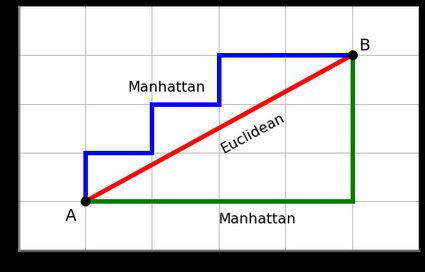

https://daviddalpiaz.github.io/r4sl/elastic-net.html#regression-1

Ridge Regression: adds penalty to sum of squared errors based on lambda x slope^2. This shrinks slopes closer to zero but never to zero because it's squared. Penalizes large slopes harder. Groups and shrinks correlated variables together. Useful when a lot of useful features(variables).

Lasso Regression: add penalty to sum of squared errors based on lambda x |slope|. This can shrink slopes to zero so can be used for feature(variable) selection. Picks one of the correlated variables and eliminates the others. Useful when there's a lot of useless variables.

Elastic Net is a combination of both because you often don't know if lots of useless or lots of useful features so it can do both. Some slopes will shrink and some will go to zero and be eliminated.

Shrinkage also depends on usefulness in predicting.

![unknown[1].png](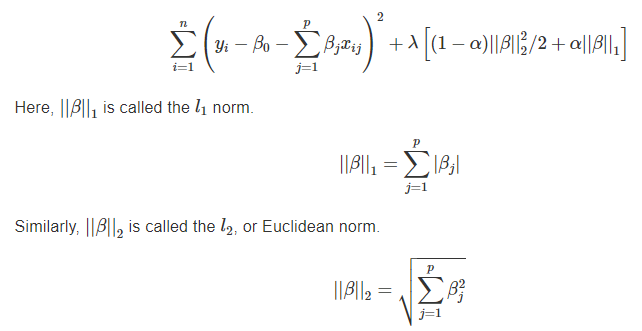)

α values between 0 and 1. 

Lasso: α = 1 

Ridge: α = 0 

α = 0.7 is a mix but closer to Lasso

Lasso and Ridge Regression increase bias, but reduce variance.

Increase bias by increasing intercept to make slope flatter (shrink) so it is less sensitive to training data (since your predicted value is now smaller) so less variance. Bias I believe means error on training data, while variance means error on unseen testing data so low-bias, high-variance means model is overfitting to training data and not performing well on unseen data.

# Question 2: Drawing Neural Nets

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers

Here's the structure they used, but how did I know how to build this?

In [ ]:
model_2 = Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(4),
    layers.Dense(2),
    layers.Dense(1)
])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


When drawing, look at the output shape first.

In output layer, output shape is one node.

To figure out how many neurons in dense_2 (previous hidden layer): 
1. let's first subtract Param # by number of nodes in output layer since each node gets 1 bias each. Here it is 3-1, so 2 left. 
2. Then divide by number of nodes in output layer because each node gets an equal amount of weight parameters. Here it is still 1 so 2/1 is 2 nodes total. Look at the output shape of dense_1 the previous hidden layer and it is indeed 2. 
3. Repeat until all the way at the top. dense_1 output is 2 nodes so subtract 2 from Param # which is 10 since each node gets a bias param. 10-2=8. Now divide leftover by number of nodes 8/2 = 4 so 4 nodes in dense_1. Look at output shape of dense and confirm that it is 4 nodes. Now it's just the input layer. Same process. Ouptut shape is 4 so subtract 4 from Param # because each node gets a bias param. 12-4=8. Divide leftover params by number of nodes in output layer so 8/4=2. Input layer is 2 nodes.
4. Now draw lines connecting each node with every one of the next layer's nodes (this is called dense).

Here's a library that can confirm that, but you still need to be able to build the model first which requires you to know how to do that and be able to determine input shape.

In [ ]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=88e68cb6825c0dcac478757998b2346e3e3227dc7768f3d240b614da88eff057
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
ann_viz(model_2, view=True, filename="network_graph", title="")

In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 1s (208 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.14) ...
Setting up poppler-utils (0.62.0-2ubuntu2.14) ...
Pr

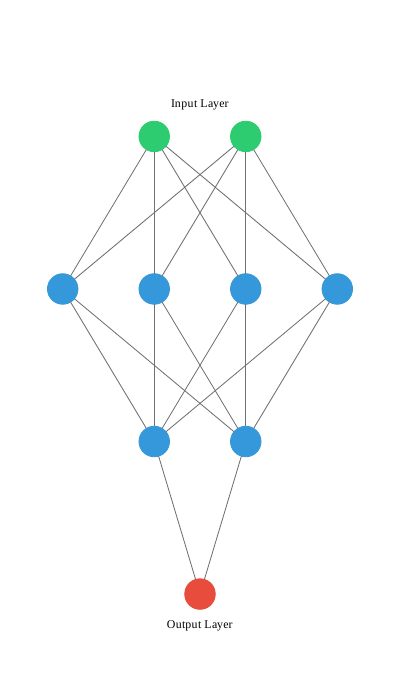

In [ ]:
from pdf2image import convert_from_path

images = convert_from_path("network_graph.pdf", size=(400, None))
images[0]

This version goes from top to bottom. As you can see, 2 nodes in the input layer, 4 in first hidden layer, 2 in second hidden layer, and 1 in output layer. All nodes from previous layer have a line that connects to each node of the next (this is called dense). Each line you could say is a weight and each node (outside of input) needs a bias too.

# Question 3: Neural Network Architecture Choices

Not sure exactly what they mean, but 

https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%201%20-%20Artificial%20Neural%20Networks.ipynb

In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
print(X[0])
print(y[0])

[2.02100097 0.49017924]
1


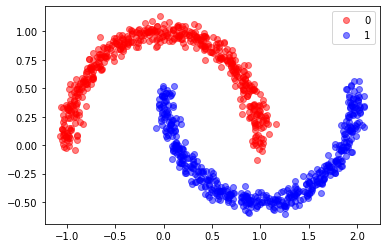

In [ ]:
plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
plt.legend()

## tanh

In [ ]:
model_3 = Sequential([
    layers.Dense(4, input_shape=(2,), activation='tanh'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 4)                 12        
                                                                 
 dense_40 (Dense)            (None, 2)                 10        
                                                                 
 dense_41 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
history_3 = model_3.fit(X, y, verbose=True, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.4945 - accuracy: 0.7620
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8350
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.8900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.8920
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9320
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9540
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9790
Epoch 11/

In [ ]:
import numpy as np

def metrics_plot(history):
    xs = np.arange(1, len(history['loss'])+1)
    plt.figure(figsize=[16,4])
    
    plt.subplot(1,2,1)
    plt.plot(xs, history['loss'], label='Training')
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(xs, history['accuracy'], label='Training')
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.tight_layout()
    
    plt.show()

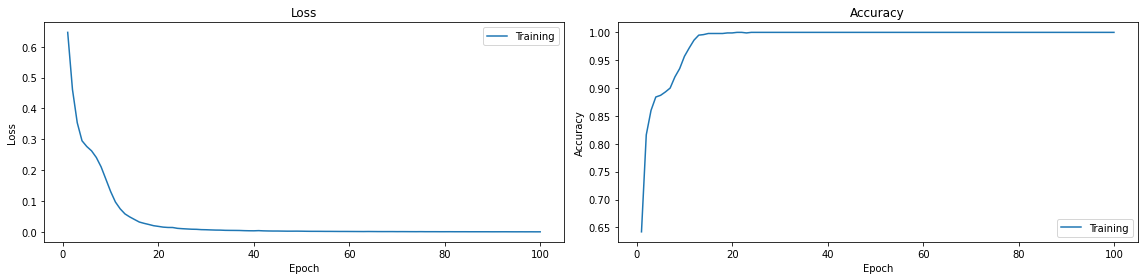

In [ ]:
metrics_plot(history_3.history)

In [ ]:
# https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%201%20-%20Artificial%20Neural%20Networks.ipynb

from matplotlib.colors import ListedColormap

def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

319/319 [==============================] - 1s 2ms/step


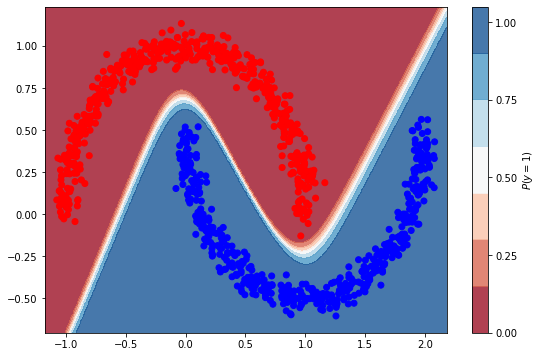

In [ ]:
plot_decision_boundary(lambda x: model_3.predict(x), X, y)

## LeakyReLu

LeakyReLu Graph:

![leaky_relu](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-25_at_3.09.45_PM.png)

In [ ]:
model_3_2 = Sequential([
    layers.Dense(4, input_shape=(2,), activation=tf.keras.layers.LeakyReLU(alpha=0.05)),
    layers.Dense(2, activation=tf.keras.layers.LeakyReLU(alpha=0.05)),
    layers.Dense(1, activation='sigmoid')
])

model_3_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 4)                 12        
                                                                 
 dense_43 (Dense)            (None, 2)                 10        
                                                                 
 dense_44 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
history_3_2 = model_3_2.fit(X, y, verbose=True, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.8340
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8570
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8620
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.8840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.8820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.8760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8830
Epoch 11/

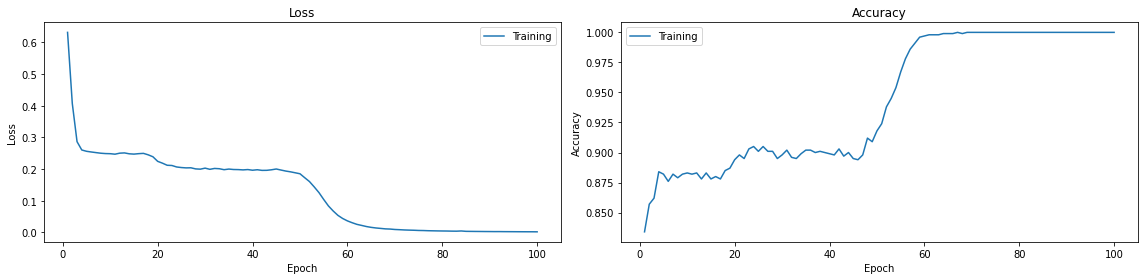

In [ ]:
metrics_plot(history_3_2.history)

319/319 [==============================] - 1s 4ms/step


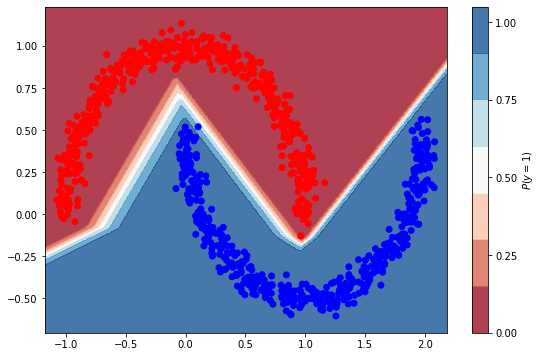

In [ ]:
plot_decision_boundary(lambda x: model_3_2.predict(x), X, y)

## ReLu

In [ ]:
model_3_3 = Sequential([
    layers.Dense(4, input_shape=(2,), activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_3_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
history_3_3 = model_3_3.fit(X, y, verbose=True, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.7100
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.8220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8570
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.8920
Epoch 11/

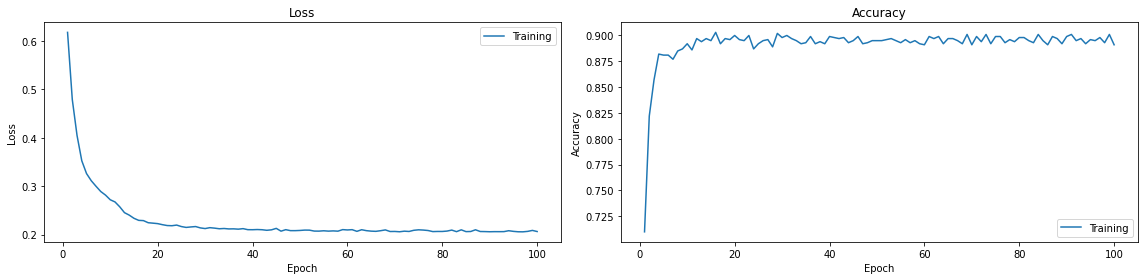

In [ ]:
metrics_plot(history_3_3.history)

319/319 [==============================] - 1s 2ms/step


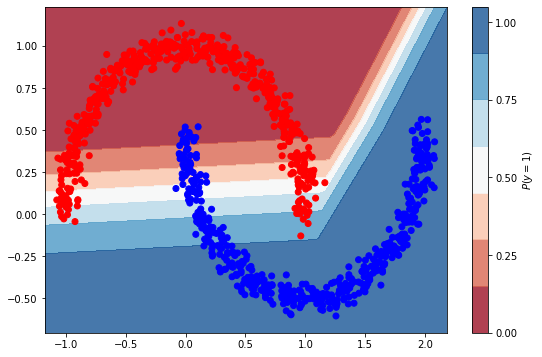

In [ ]:
plot_decision_boundary(lambda x: model_3_3.predict(x), X, y)

In [ ]:
model_3_4 = Sequential([
    layers.Dense(16, input_shape=(2,), activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_3_4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
history_3_4 = model_3_4.fit(X, y, verbose=True, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.8040
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.8710
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.8890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9080
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9230
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9510
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9940
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9990
Epoch 11/

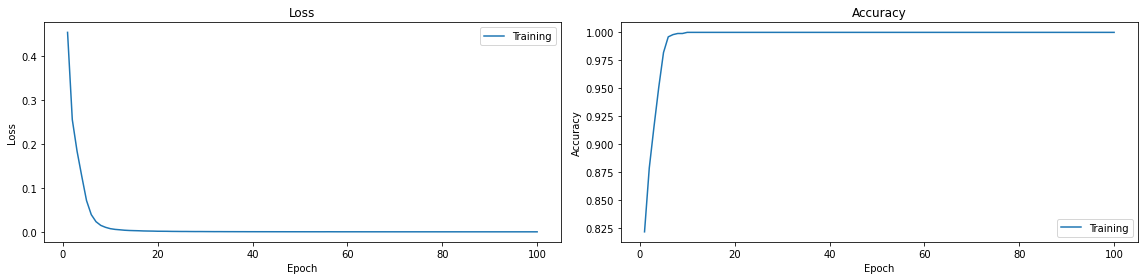

In [ ]:
metrics_plot(history_3_4.history)

319/319 [==============================] - 1s 3ms/step


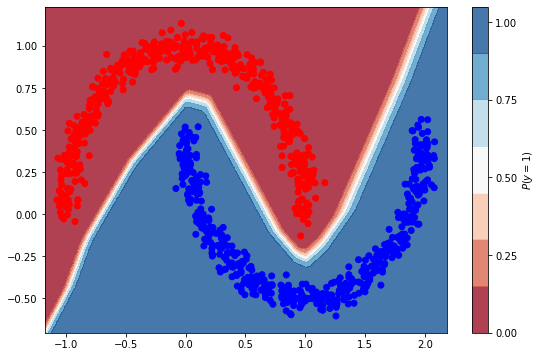

In [ ]:
plot_decision_boundary(lambda x: model_3_4.predict(x), X, y)

In [ ]:
model_3_5 = Sequential([
    layers.Dense(12, input_shape=(2,), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_3_5.summary()

model_3_5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
history_3_5 = model_3_5.fit(X, y, verbose=True, epochs=100)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 12)                36        
                                                                 
 dense_88 (Dense)            (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.5066 - accuracy: 0.7870
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2994 - accuracy: 0.8640
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.8810
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.8880
Epoch 5/100
32/32 [==============================] - 0s 

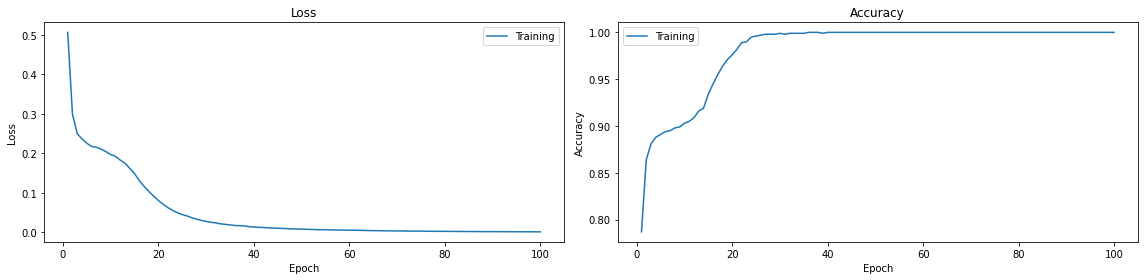

In [ ]:
metrics_plot(history_3_5.history)

319/319 [==============================] - 2s 5ms/step


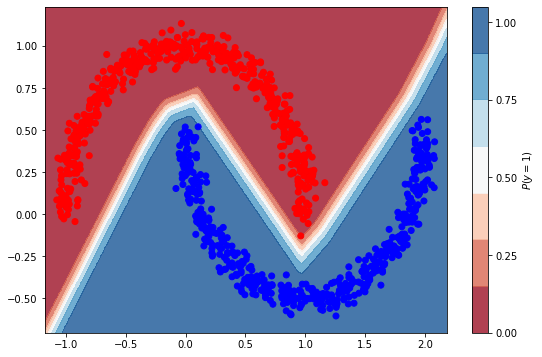

In [ ]:
plot_decision_boundary(lambda x: model_3_5.predict(x), X, y)

In [ ]:
model_3_6 = Sequential([
    layers.Dense(64, input_shape=(2,), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_3_6.summary()

model_3_6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
history_3_6 = model_3_6.fit(X, y, verbose=True, epochs=100)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 64)                192       
                                                                 
 dense_90 (Dense)            (None, 32)                2080      
                                                                 
 dense_91 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.3246 - accuracy: 0.8620
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9680
Epoch 4/100
32/32 

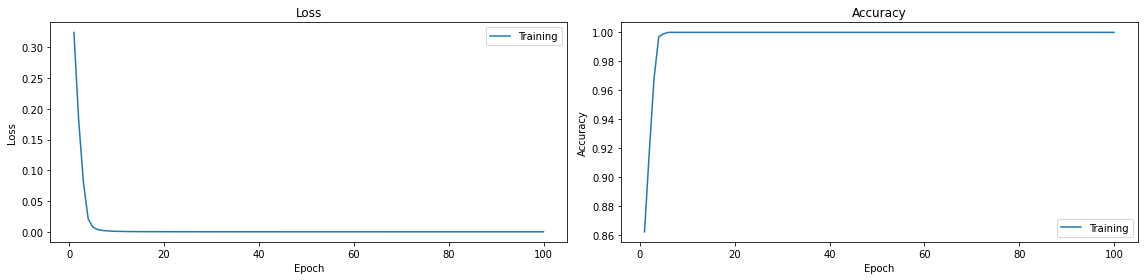

In [ ]:
metrics_plot(history_3_6.history)

319/319 [==============================] - 1s 2ms/step


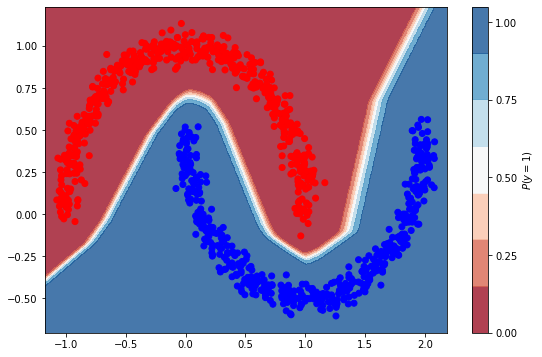

In [ ]:
plot_decision_boundary(lambda x: model_3_6.predict(x), X, y)

# Question 4: Images

Vectorize means to flatten in tensorflow keras. 

The matrix into a single really long column vector.

params = (width * height * color_channels)*1000 + 1 bias for each node

params = (640 * 480 * 3)*1000 + 1000 = 921,601,000

Proof:

In [ ]:
model_4 = Sequential([
    layers.InputLayer(input_shape=(640,480,3)),
    layers.Flatten(),
    layers.Dense(1000)
])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 921600)            0         
                                                                 
 dense_1 (Dense)             (None, 1000)              921601000 
                                                                 
Total params: 921,601,000
Trainable params: 921,601,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4_2 = Sequential([
    layers.InputLayer(input_shape=(640,480,3)),
    layers.Conv2D(64, kernel_size = 3, strides = 2), # use convolution filter layers, no padding and stride 2 decreases parameters
    layers.Flatten(),
    layers.Dense(100) # reduce the number of nodes in fully connected dense layer
])

model_4_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 319, 239, 64)      1792      
                                                                 
 flatten (Flatten)           (None, 4879424)           0         
                                                                 
 dense (Dense)               (None, 100)               487942500 
                                                                 
Total params: 487,944,292
Trainable params: 487,944,292
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4_3 = Sequential([
    layers.InputLayer(input_shape=(640,480,3)),
    layers.Conv2D(64, kernel_size = 3, strides = 2),
    layers.MaxPool2D(), #use maxpool which only picks the max of the values in the window size default 2x2
    layers.Flatten(),
    layers.Dense(100)
])

model_4_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 319, 239, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 119, 64)     0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1210944)           0         
                                                                 
 dense_1 (Dense)             (None, 100)               121094500 
                                                                 
Total params: 121,096,292
Trainable params: 121,096,292
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4_4 = Sequential([
    layers.InputLayer(input_shape=(640,480,3)),
    layers.Conv2D(64, kernel_size = 3, strides = 2),
    layers.MaxPool2D(),
    layers.Conv2D(32, kernel_size = 3, strides = 2), #add another convolution filter layer
    layers.Flatten(),
    layers.Dense(100)
])

model_4_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 319, 239, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 159, 119, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 79, 59, 32)        18464     
                                                                 
 flatten_2 (Flatten)         (None, 149152)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               14915300  
                                                                 
Total params: 14,935,556
Trainable params: 14,935,556
Non-trainable params: 0
__________________________________________

In [ ]:
model_4_5 = Sequential([
    layers.InputLayer(input_shape=(640,480,3)),
    layers.Resizing(480,480),        # resize the the original image
    layers.Conv2D(64, kernel_size = 3, strides = 2),
    layers.MaxPool2D(),
    layers.Conv2D(32, kernel_size = 3, strides = 2),
    layers.Flatten(),
    layers.Dense(100)
])

model_4_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 480, 480, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 239, 239, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 119, 119, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 32)        18464     
                                                                 
 flatten_3 (Flatten)         (None, 111392)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               11139300  
                                                      

In [ ]:
model_4_6 = Sequential([
    layers.InputLayer(input_shape=(640,480,3)),
    layers.Resizing(480,480),
    layers.Conv2D(64, kernel_size = 3, strides = 2),
    layers.MaxPool2D(),
    layers.Conv2D(32, kernel_size = 3, strides = 2),
    layers.Flatten(),
    layers.Dense(1000)   #now even when I put back original 1000 nodes it's 1/9 the size of original, don't recommend tho
])

model_4_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 480, 480, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 239, 239, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 119, 119, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 32)        18464     
                                                                 
 flatten_4 (Flatten)         (None, 111392)            0         
                                                                 
 dense_4 (Dense)             (None, 1000)              111393000 
                                                      

# Question 5: Loss and Accuracy

Loss represents the distance of true values from predicted values of model so a sum of errors. If loss is going up only, it means your model is not learning and you should probably change your architecture, decrease learning rate, etc. 

Accuracy is opposite. If accuracy starts going down after increasing on test set, it means you have went past the best parameters and started to overfit.

![accuracy](https://forum-cdn.knime.com/uploads/default/c03f5837ac919e7152bdb84b2891d5d0e2674dbf)

# Question 6: Overfitting

1. **Early stopping**: Don't train for so many epochs and you can set it so it stops early if your metric (loss/accuracy) goes the wrong direction and revert to the previous best epoch.

2. **Use less parameters/nodes** (simplify your model). More complex will overfit training data better but do bad on unseen test data.

3. **Regularization** l1 (absolute value), l2 (squared value) penalty of weights. This is kind of like how lasso and ridge works hence the naming.

4. **Dropout**: randomly drops neurons

https://www.kaggle.com/general/175912

More on Dropout: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

# Question 7: Role of Errors

Minimizing residual errors is the goal of solving linear regression i.e. estimating the coefficients. 

Errors can help us compare different models so the better fitting model will have smaller square errors.

# Question 8: Linear Regression (Matrix)

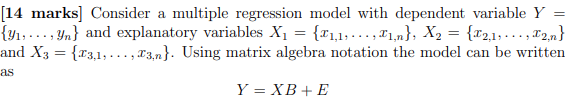

a)What are the elements of X, B and E?

Each row of X is a data observation with each column of X being the data of that variable.

Elements of B are parameters to solve linear regression so intercept and slopes,

Elements of E are errors of each row of data.

b) What are the dimensions of X, B and E?

Three explanatory variables X1, X2, and X3 and one for the intercept X0.

Since we don't know how many rows and it says n there instead so that means X shape: n rows x 4 columns.

B is a single column vector where each row is a parameter so X0(bias/intercept), X1, X2, and X3: 4 rows x 1 column

E is also single column vector so n x 1

c) What is the interpretation of the elements in B?

As stated above, each element is a paramater with the first being the intercept/bias and the rest being the slope of the each explanatory variable.

d)  What is the name usually given to X?

Design/Model Matrix. Idk which one your lecturer picks.

e) What is a requirement about the columns of X in order to estimate the coefficients of the regression model? Please explain your answer

Columns must not be linearly dependent (aka uncorrelated). Imagine you have a column of height in cm and height in inches. This would be multicollinearity and make it so your matrix is not invertible. That means you will not have a unique solution for the linear squares problem.

f) What are desirable properties of the elements of E?

Uncorrelated Errors (independent), normally distributed, constant variance, average is zero. 

g) What happens if the determinant of $X^{T}X$ is different from zero but close to
it?

Matrix will be ill-conditioned which means it will be very senstive to very small changes in the input, will result in huge changes in the estimation of the parameters.

# Appendix:

## Matrix Inversion

![invert](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/formula-or-trick-to-find-inverse-of-2x2-matrix-1630645048.png)

Example:

![ex_inv](https://images.slideplayer.com/19/5859308/slides/slide_8.jpg)

## Matrix Multiplication

![unknown[1].png](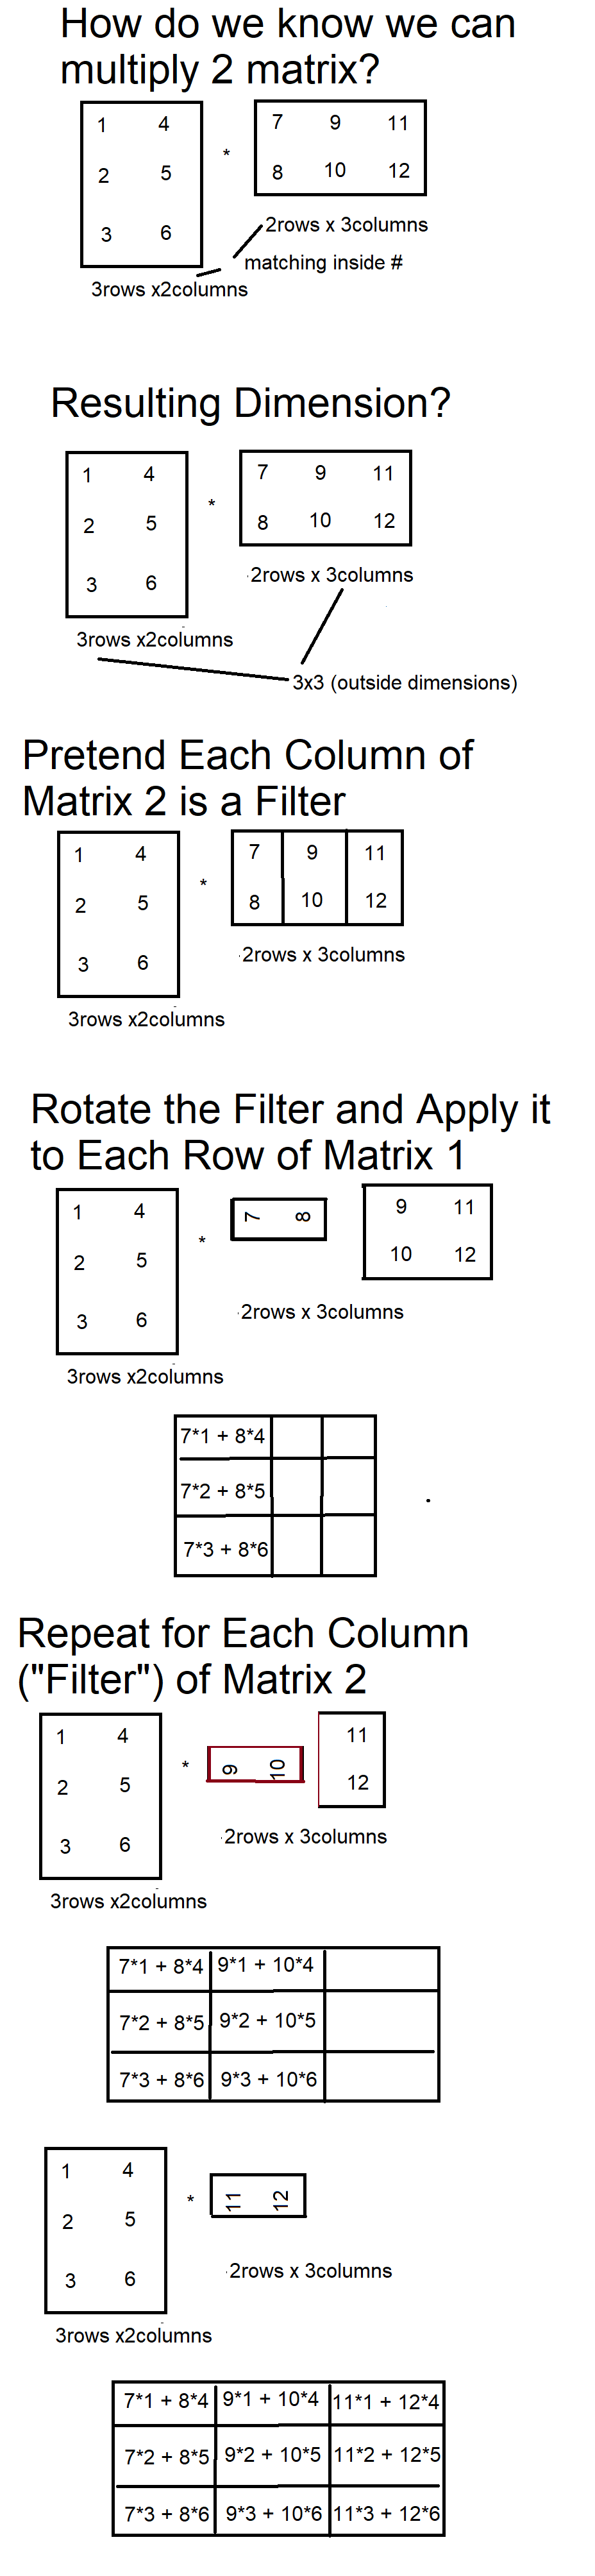)

As a gif someone made:

![mat_mult](https://thumbs.gfycat.com/PositiveExhaustedAmericangoldfinch-max-1mb.gif)

## Filters

### Feature Map Calculation:

Image sources:https://medium.com/towards-data-science/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

![example](https://miro.medium.com/max/720/1*cTEp-IvCCUYPTT0QpE3Gjg@2x.png)

![filter_process](https://miro.medium.com/max/720/1*L4T6IXRalWoseBncjRr4wQ@2x.gif)

![image_math](https://miro.medium.com/max/720/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif)

Basically you put the filter over the image in the top left corner and multiply the numbers in the same place then add them all up. Then move to the next spot.

### Stride:

That was stride 1 no padding.

Stride: steps to take so 1 is move by 1; 2 is move by 2 and so skip a step.

Padding: adds a layer of zeros on outside of image so image doesn't shrink on filter.

Stride 2:

![stride_2](https://miro.medium.com/max/720/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif)

### Padding:

![padding](https://miro.medium.com/max/720/1*W2D564Gkad9lj3_6t9I2PA@2x.gif)

See how result is 5x5 so change in size?

### Max Pooling: 

Takes the max of all the numbers in the window (like a filter but no numbers aka weights).

![max_pool](https://miro.medium.com/max/720/1*ReZNSf_Yr7Q1nqegGirsMQ@2x.png)

## Drawing Neural Network Matrix Style

https://www.youtube.com/watch?v=m7HDdqd_62A&t=438s

Each layer has two parts:
1. do the linear combination
2. put the result into an activation function for final output of layer


Linear Combination part:

z = wx + b

where:
* z is input into activation
* w is weight matrix
* x is input
* b is bias

Activation part:

a = g(z)

where:
* a is the final output of the layer
* g is the activation function
* z is the result from linear combination

This is ALL JUST ONE LAYER, not two.

z = wx + b 

Always W * X in that order

Take a look at the matrix multiplication section of appendix

Shape of matrix is rows x columns so 3x2 is a matrix of 3rows 2columns.

Two matrix can be multiplied if inside shape match so 3x2 * 3x3 can't multiply, but 3x2 * 2x5 can.

Result of multiplication is the outside numbers so 4x2 * 2x3 would result in 4x3.



Your resulting shape should match your bias shape cause that's the only way they can be added.

Example: (stat448_exam_master_20191008.pdf Q4)

input vector: 3rows x 1column means 3 inputs

w1: 2rows x 3columns

w1*x = 2x3 * 3x1

Inside match so can be multiplied, result is outside shape which is 2x1.

That means there are two nodes in the hidden layer 1 and this matches bias dim of 2x1.

w2: 1row x 2columns 

w2*x2 = 1x2 * 2x1

Inside match so can be multiplied, result is outside shape which is 1x1 so one node and this matches bias2 dim of 1x1.

## Stochastic Gradient Descent

Algorithm that tries to find the slope zero because that is the minimum (usually we're trying to the find the minimum square error).

It starts at random points and heads toward the direction that is closer to zero because the derivative(slope) will tell it which way to go.

![sto_grad](https://baptiste-monpezat.github.io/6f5cc892ec345d96f64c881b62b0d910/gradient_descent_parameter_a.gif)

## Henry Cavil News

Really???? Why are you look at this right now? Take that walk of shame back to the top.